In [57]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer


In [59]:
df = pd.read_csv(r"E:\Study\Data Analyst\Practice data\CyberBullying Detection Dataset\final_hateXplain.csv")
df.head(9)

,Unnamed: 0,comment,label,Race,Religion,Gender,Sexual_Orientation,Miscellaneous
0,0,0 u0 lmao wow fuck you too 😂 😂,normal,No_race,Nonreligious,No_gender,No_orientation,Not Avalaible
1,1,1 0 th floor maybe wow cnn with the fakenews t...,offensive,No_race,Nonreligious,No_gender,No_orientation,Other
2,2,1 0 yrs <number> white women raped by niggers ...,hatespeech,African,Nonreligious,No_gender,No_orientation,Not Avalaible
3,3,1 2 h ago ching chong accepted your friend req...,offensive,Asian,Nonreligious,No_gender,No_orientation,Not Avalaible
4,4,1 8 th century mayhem and lawlessness had noth...,normal,No_race,Nonreligious,No_gender,No_orientation,Not Avalaible
5,5,1 9 3 0 sgermany geneticjews controlled white ...,hatespeech,Caucasian,Jewish,No_gender,No_orientation,Not Avalaible
6,6,1 9 5 0 white america the most peaceful decade...,hatespeech,African,Nonreligious,No_gender,No_orientation,Not Avalaible
7,7,1 h de retard au work shessh,normal,No_race,Nonreligious,No_gender,No_orientation,Not Avalaible
8,8,1 st wave feminism let us vote and shit asshol...,normal,No_race,Nonreligious,Women,No_orientation,Not Avalaible


In [61]:
df = df.drop("Unnamed: 0", axis = 1)


In [63]:
df.to_csv(r"E:\Study\Data Analyst\Practice data\CyberBullying Detection Dataset\final_hateXplain.csv")
df

,comment,label,Race,Religion,Gender,Sexual_Orientation,Miscellaneous
0,0 u0 lmao wow fuck you too 😂 😂,normal,No_race,Nonreligious,No_gender,No_orientation,Not Avalaible
1,1 0 th floor maybe wow cnn with the fakenews t...,offensive,No_race,Nonreligious,No_gender,No_orientation,Other
2,1 0 yrs <number> white women raped by niggers ...,hatespeech,African,Nonreligious,No_gender,No_orientation,Not Avalaible
3,1 2 h ago ching chong accepted your friend req...,offensive,Asian,Nonreligious,No_gender,No_orientation,Not Avalaible
4,1 8 th century mayhem and lawlessness had noth...,normal,No_race,Nonreligious,No_gender,No_orientation,Not Avalaible
...,...,...,...,...,...,...,...
20104,😂 😂 😂 😂 😂 y ’ all be so mad at caucasians fail...,offensive,African,Nonreligious,No_gender,No_orientation,Not Avalaible
20105,🤔 🤔 🤔 🤔 mmm yes the trebuchet memes are much n...,hatespeech,Arab,Islam,No_gender,No_orientation,Not Avalaible
20106,🤣 this so ghetto i ’ m ready to get tf,offensive,No_race,Nonreligious,No_gender,No_orientation,Other
20107,🤣 🤣 😂 😂 🤣 🤣 😂 😂 🤣 🤣 you spelled my name wrong ...,hatespeech,Arab,Nonreligious,No_gender,No_orientation,Not Avalaible


In [71]:
categorical_cols = ['comment', 'label', 'Race', 'Gender', 'label','Religion','Sexual_Orientation','Miscellaneous']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [73]:
df


,comment,label,Race,Religion,Gender,Sexual_Orientation,Miscellaneous
0,0,1,7,5,1,4,3
1,1,2,7,5,1,4,4
2,2,0,0,5,1,4,3
3,3,2,2,5,1,4,3
4,4,1,7,5,1,4,3
...,...,...,...,...,...,...,...
20104,20104,2,0,5,1,4,3
20105,20105,0,1,3,1,4,3
20106,20106,2,7,5,1,4,4
20107,20107,0,1,5,1,4,3


In [75]:
df.isnull().sum()

comment               0
label                 0
Race                  0
Religion              0
Gender                0
Sexual_Orientation    0
Miscellaneous         0
dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20109 entries, 0 to 20108
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   comment             20109 non-null  int32
 1   label               20109 non-null  int64
 2   Race                20109 non-null  int32
 3   Religion            20109 non-null  int32
 4   Gender              20109 non-null  int32
 5   Sexual_Orientation  20109 non-null  int32
 6   Miscellaneous       20109 non-null  int32
dtypes: int32(6), int64(1)
memory usage: 628.5 KB


In [45]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [83]:
df.Gender.unique()

array([1, 2, 0])

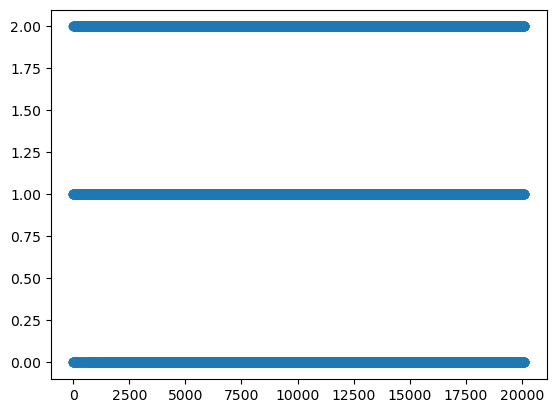

In [96]:
plt.scatter(df['comment'], df['label'])

In [98]:
km = KMeans(n_clusters = 3)

KMeans(n_clusters=3)

In [102]:
y_pred = km.fit_predict(df[['comment', 'label']])

In [106]:
df['cluster'] = y_pred

In [108]:
df

,comment,label,Race,Religion,Gender,Sexual_Orientation,Miscellaneous,cluster
0,0,1,7,5,1,4,3,2
1,1,2,7,5,1,4,4,2
2,2,0,0,5,1,4,3,2
3,3,2,2,5,1,4,3,2
4,4,1,7,5,1,4,3,2
...,...,...,...,...,...,...,...,...
20104,20104,2,0,5,1,4,3,0
20105,20105,0,1,3,1,4,3,0
20106,20106,2,7,5,1,4,4,0
20107,20107,0,1,5,1,4,3,0


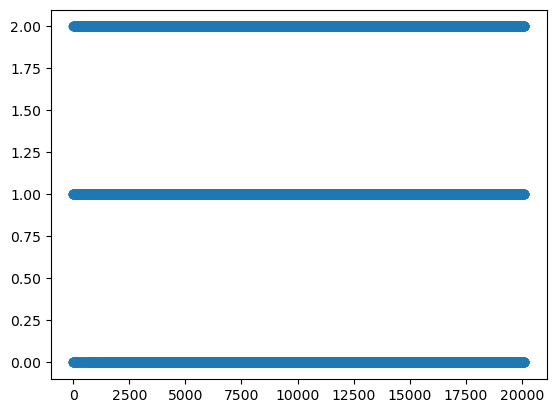

In [110]:
plt.scatter(df['comment'], df['label'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


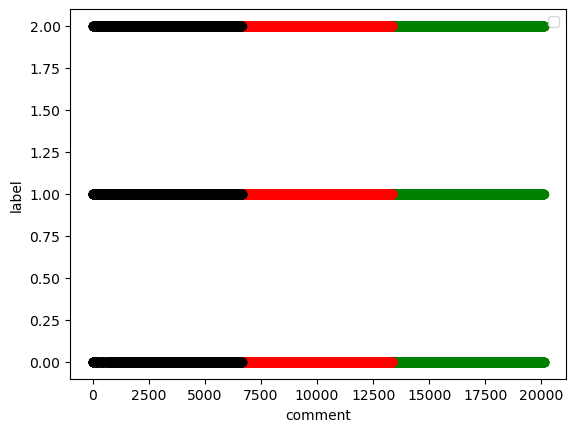

In [118]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.comment, df1.label, color = 'green')
plt.scatter(df2.comment, df2.label, color = 'red')
plt.scatter(df3.comment, df3.label, color = 'black')

plt.xlabel('comment')
plt.ylabel('label')
plt.legend()

In [126]:
scaler = MinMaxScaler()
scaler.fit(df[['label']])
df['label'] = scaler.transform(df[['label']])
df

,comment,label,Race,Religion,Gender,Sexual_Orientation,Miscellaneous,cluster
0,0,0.5,7,5,1,4,3,2
1,1,1.0,7,5,1,4,4,2
2,2,0.0,0,5,1,4,3,2
3,3,1.0,2,5,1,4,3,2
4,4,0.5,7,5,1,4,3,2
...,...,...,...,...,...,...,...,...
20104,20104,1.0,0,5,1,4,3,0
20105,20105,0.0,1,3,1,4,3,0
20106,20106,1.0,7,5,1,4,4,0
20107,20107,0.0,1,5,1,4,3,0


In [128]:
scaler.fit(df[['comment']])
df['comment'] = scaler.transform(df[['comment']])
df

,comment,label,Race,Religion,Gender,Sexual_Orientation,Miscellaneous,cluster
0,0.000000,0.5,7,5,1,4,3,2
1,0.000050,1.0,7,5,1,4,4,2
2,0.000099,0.0,0,5,1,4,3,2
3,0.000149,1.0,2,5,1,4,3,2
4,0.000199,0.5,7,5,1,4,3,2
...,...,...,...,...,...,...,...,...
20104,0.999801,1.0,0,5,1,4,3,0
20105,0.999851,0.0,1,3,1,4,3,0
20106,0.999901,1.0,7,5,1,4,4,0
20107,0.999950,0.0,1,5,1,4,3,0


In [158]:
km1 = KMeans(n_clusters=3)
y_pred = km1.fit_transform(df[['comment','label']])

In [160]:
y_pred

array([[0.27655172, 0.77547862, 0.76016967],
       [0.39480075, 0.76982238, 1.15230247],
       [0.70500293, 1.05351296, 0.57248933],
       ...,
       [0.8487624 , 0.36126584, 1.08747199],
       [1.03036817, 0.80490715, 0.42736147],
       [1.03040593, 0.80492376, 0.4274112 ]])

In [166]:
df.cluster = y_pred


In [168]:
df

,comment,label,Race,Religion,Gender,Sexual_Orientation,Miscellaneous,cluster
0,0.000000,0.5,7,5,1,4,3,0.276552
1,0.000050,1.0,7,5,1,4,4,0.394801
2,0.000099,0.0,0,5,1,4,3,0.705003
3,0.000149,1.0,2,5,1,4,3,0.394746
4,0.000199,0.5,7,5,1,4,3,0.276395
...,...,...,...,...,...,...,...,...
20104,0.999801,1.0,0,5,1,4,3,0.848671
20105,0.999851,0.0,1,3,1,4,3,1.030293
20106,0.999901,1.0,7,5,1,4,4,0.848762
20107,0.999950,0.0,1,5,1,4,3,1.030368


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


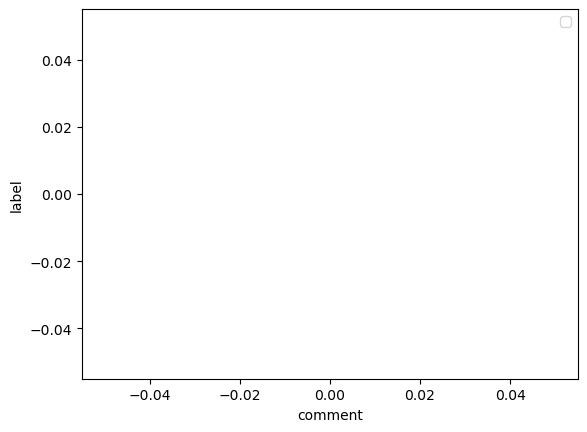

In [170]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.comment, df1.label, color = 'green')
plt.scatter(df2.comment, df2.label, color = 'red')
plt.scatter(df3.comment, df3.label, color = 'black')

plt.xlabel('comment')
plt.ylabel('label')
plt.legend()